<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [124]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import squarify
from spacy.tokenizer import Tokenizer
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_lg')

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [92]:
##### Your Code Here #####

## 2) Use Spacy to tokenize / clean the listings 

In [125]:
df = pd.read_csv('data/job_listings.csv')

In [126]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [127]:
df = df.drop('Unnamed: 0', axis=1)

In [128]:
df.columns

Index(['description', 'title'], dtype='object')

In [129]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [130]:
df['description'] = df['description'].apply(remove_html_tags)

In [131]:
df.description = df.description.replace(r'\\n',' ', regex=True) 

In [133]:
df.description[0]

'b"Job Requirements: Conceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"'

In [99]:
df['description'] = df['description'].apply(nlp)

In [100]:
df.description

0      (b"Job, Requirements:\nConceptual, understandi...
1      (b'Job, Description\n\nAs, a, Data, Scientist,...
2      (b'As, a, Data, Scientist, you, will, be, work...
3      (b'$4,969, -, $, 6,756, a, monthContractUnder,...
4      (b'Location, :, USA, \xe2\x80\x93, multiple, l...
5      (b'Create, various, Business, Intelligence, An...
6      (b'As, Spotify, Premium, swells, to, over, 96,...
7      (b"Everytown, for, Gun, Safety, ,, the, nation...
8      (b"MS, in, a, quantitative, discipline, such, ...
9      (b'Slack, is, hiring, experienced, data, scien...
10     (b'Who, We, Are\nBlackThorn, Therapeutics, is,...
11     (b'Part, -, timeAbout, The, Opportunity\nHere,...
12     (b"nfosys\xe2\x80\x93, Data, &, amp, ;, Analyt...
13     (b'As, Spotify, Premium, swells, to, over, 96,...
14     (b'Experience, with, guiding, R&amp;D, strateg...
15     (b'The, Atlantic, is, seeking, a, Data, Scient...
16     (b'THE, CHALLENGE\nEventbrite, is, big, ,, bus...
17     (b'ContractWe, are, look

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [70]:
vect = CountVectorizer(stop_words='english', min_df=0.05, max_df=0.90)

vect.fit(df.description)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.05,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [71]:
dtm = vect.transform(df.description)

In [72]:
vect.get_feature_names()

['000',
 '10',
 '100',
 '2019',
 '40',
 'abilities',
 'ability',
 'able',
 'academic',
 'access',
 'accommodation',
 'accuracy',
 'achieve',
 'acquisition',
 'action',
 'actionable',
 'activities',
 'ad',
 'addition',
 'additional',
 'address',
 'advance',
 'advanced',
 'advertising',
 'affirmative',
 'age',
 'agency',
 'agile',
 'ai',
 'algorithm',
 'algorithms',
 'alongside',
 'amazon',
 'amounts',
 'amp',
 'analyses',
 'analysis',
 'analyst',
 'analysts',
 'analytic',
 'analytical',
 'analytics',
 'analyze',
 'analyzing',
 'ancestry',
 'answer',
 'applicable',
 'applicants',
 'application',
 'applications',
 'applied',
 'applies',
 'apply',
 'applying',
 'approach',
 'approaches',
 'appropriate',
 'architecture',
 'architectures',
 'area',
 'areas',
 'art',
 'artificial',
 'aspects',
 'assess',
 'assets',
 'assigned',
 'assist',
 'assistance',
 'attention',
 'audience',
 'audiences',
 'automated',
 'automation',
 'available',
 'aws',
 'azure',
 'bachelor',
 'background',
 'backgroun

In [73]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,x99,x99ll,x99re,x99s,x99t,x9d,xe2,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,2,2,0,0,8,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## 4) Visualize the most common word counts

In [134]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

tokenizer = Tokenizer(nlp.vocab)

df['tokens'] = df['description'].apply(tokenizer)

In [138]:
from collections import Counter

word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[(b"Job, 1),
 (Requirements:, 1),
 (Conceptual, 1),
 (understanding, 1),
 (in, 1),
 (Machine, 1),
 (Learning, 1),
 (models, 1),
 (like, 1),
 (Nai\xc2\xa8ve, 1)]

In [143]:
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
    
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns=['word','count'])
    
    wc['rank'] = wc['count'].rank(method='first',  ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x/total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x:  x/ total_docs)
    
    return wc.sort_values(by='rank')

In [144]:
wc = count(df['tokens'])

In [146]:
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
19,"b""Job",1,1,1.0,0.000005,0.000005,0.002347
101,Requirements:,1,1,2.0,0.000005,0.000010,0.002347
92,Conceptual,1,1,3.0,0.000005,0.000014,0.002347
56,understanding,1,1,4.0,0.000005,0.000019,0.002347
47,in,1,1,5.0,0.000005,0.000024,0.002347
10,Machine,1,1,6.0,0.000005,0.000029,0.002347
1,Learning,1,1,7.0,0.000005,0.000033,0.002347
83,models,1,1,8.0,0.000005,0.000038,0.002347
74,like,1,1,9.0,0.000005,0.000043,0.002347
38,Nai\xc2\xa8ve,1,1,10.0,0.000005,0.000048,0.002347


TypeError: Argument 'other' has incorrect type (expected spacy.tokens.token.Token, got str)

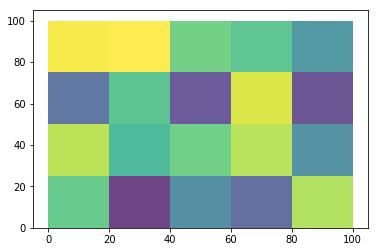

In [145]:
wc_top20 = wc[wc['rank']<=20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'],alpha=.8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [76]:
tfidf = TfidfVectorizer(stop_words='english')

sparse = tfidf.fit_transform(df.description)

In [78]:
dtm_tfidf = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

In [79]:
dtm_tfidf.head()

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.104421,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [80]:
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix = cosine_similarity(dtm_tfidf)
dist = pd.DataFrame(dist_matrix)

In [81]:
dist[0].nlargest(5)

0      1.000000
276    0.153965
336    0.148508
274    0.126799
338    0.117706
Name: 0, dtype: float64

In [83]:
df.description[0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [84]:
df.description[276]

'b"Facebook\'s mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we\'re building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. Whether we\'re creating new products or helping a small business expand its reach, people at Facebook are builders at heart. Our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. Together, we can help people build stronger communities \\xe2\\x80\\x94 we\'re just getting started.\\nThe Infrastructure Strategy group is responsible for the strategic analysis to support and enable the continued growth critical to Facebook\\xe2\\x80\\x99s infrastructure organization. The ideal candidate will be passionate about Facebook, have strong analytical and mo

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [86]:
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [87]:
nn.kneighbors([dtm_tfidf.iloc[0]])

(array([[0.        , 1.30079588, 1.30498405, 1.32151492, 1.32837826]]),
 array([[  0, 276, 336, 274, 338]]))

In [89]:
ideal_description = ['Seeking data scientist for fast paced exciting cutting edge in gaming industry.']

query = tfidf.transform(ideal_description)

nn.kneighbors(query.todense())

(array([[1.32952097, 1.33426338, 1.33549162, 1.33549162, 1.34187539]]),
 array([[185, 331, 184, 147, 172]]))

In [91]:
df.description[185]

"b'Full-time Position\\n\\nThe Senior Data Scientist will be a skilled problem solver who has a passion for utilizing data to drive business decisions and interest in driving the sports industry forward. The position will involve working closely with the analytics and business intelligence teams for the planning, execution, and delivery of all KAGR analytics and data science products. Products may include a variety of predictive models, marketing analytics, forecasting, development of sales and business analytics, etc. Additionally, the Senior Data Scientist will be responsible for building new expertise within the Analytics &amp; Data Science team through training and product R&amp;D.\\nThe Company\\nKraft Analytics Group (KAGR) is technology and services company comprised of a brilliant group of data science and data analytics professionals who are at the top of their game in the sports and entertainment industry. This company is all about data-driven decision making that focuses on 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 